# PROJECT : SALES PREDICTION

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("advertising (2).csv")

df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### BASIC INFORMATION OF DATASET

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### STATISTICAL INFORMATION OF DATASET

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


### OUTLIERS 

<Axes: xlabel='Sales'>

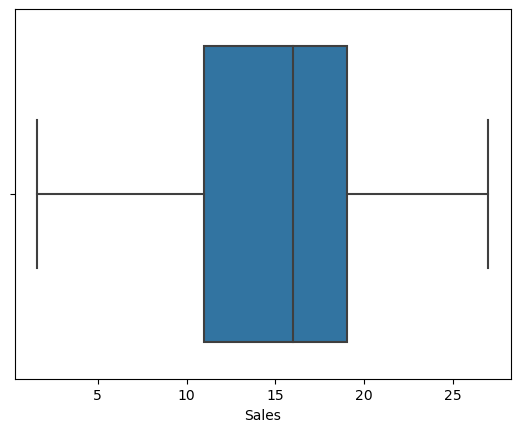

In [56]:
sns.boxplot(data=x,x=y)

### SKEWNESS

In [57]:
from scipy.stats import skew

for i in df:
    print(f'Skew of {i}:',skew(df[i]))

Skew of TV: -0.06932836662244649
Skew of Radio: 0.0934668451108453
Skew of Newspaper: 0.8879959753085498
Skew of Sales: -0.0731850348821409


#### Here, no need to remove skewness and it also not affect to our model.

### Separating into Features and Target Coulmns

In [8]:
x=df.iloc[:,0:-1]
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [9]:
y=df.iloc[:,-1]
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

### UNIVARIATE AND BIVARIATE ANALYSIS

"The univariate graph, Histplot represents that the Distribution of our TV expennditures."


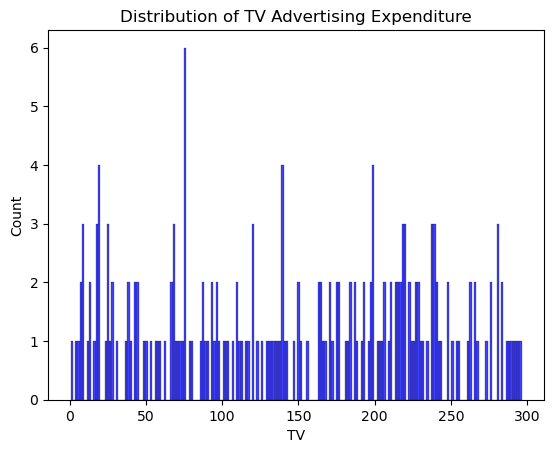

In [10]:
plt.subplot(1, 1, 1)
sns.histplot(df['TV'], bins=199, color='blue')
plt.title('Distribution of TV Advertising Expenditure')

print('"The univariate graph, Histplot represents that the Distribution of our TV expennditures."')

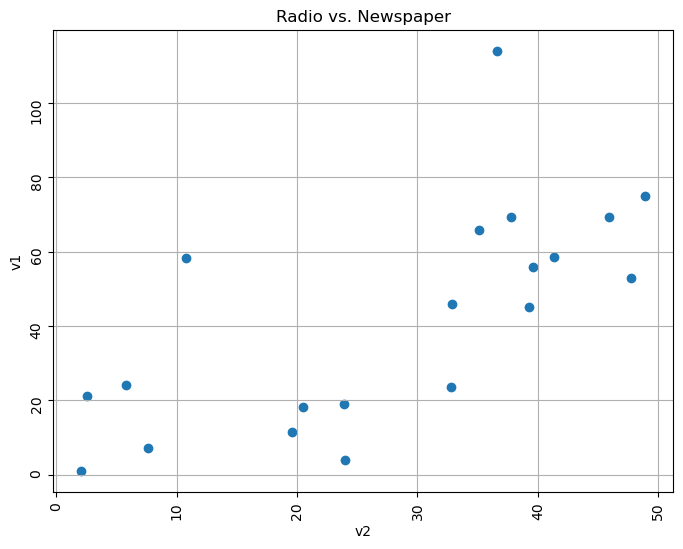

"The bivariate graph, Scatterplot demonstrates that the no linear Relation present between that variables of sales."


In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(x=df['Radio'][0:20], y=df['Newspaper'][0:20])
plt.title('Radio vs. Newspaper')
plt.xlabel('v2')
plt.ylabel('v1')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.grid()
plt.show()

print('"The bivariate graph, Scatterplot demonstrates that the no linear Relation present between that variables of sales."')

### Split the data into training and testing

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

### 1 - Predicting the data using Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [14]:
ypred

array([21.29142142, 18.04194205, 10.03065109, 21.04818991, 20.75167113,
       24.52948332, 16.85936471, 15.69800653, 10.17237239, 18.90266535,
       15.82750789, 10.53768469, 18.86292327, 15.57969067, 17.89853384,
       15.35974564, 13.76329903, 21.00074026, 10.03000895, 19.20973979,
       11.12327234, 12.18140998,  8.67037889, 11.96248005, 12.63332284,
       16.83484748,  9.75317608, 21.06453498, 18.075131  , 19.52477289,
       22.04440958, 17.90745151, 16.48534479, 14.79190923, 21.3573104 ,
       16.9364024 , 17.18742868, 12.33688324, 21.02974736,  7.77584247,
        5.413222  ,  9.64006117,  6.91408859, 19.22413789,  7.93800502,
       15.16854596, 13.73132724, 21.01419263, 20.49929224, 20.57792216])

In [15]:
xtrain.head()

,TV,Radio,Newspaper
98,289.7,42.3,51.2
123,123.1,34.6,12.4
119,19.4,16.0,22.3
53,182.6,46.2,58.7
33,265.6,20.0,0.3


In [16]:
ytrain.head()

98     25.4
123    15.2
119     6.6
53     21.2
33     17.4
Name: Sales, dtype: float64

In [17]:
xtest.head()

,TV,Radio,Newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0


In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)

print(f'mae : {mae}\nmse : {mse}\nrmse : {rmse}\naccuracy : {r2}')

mae : 1.2187904107011895
mse : 2.2789251586850003
rmse : 1.5096109295725837
accuracy : 0.9048917241361681


#### We have achieved an Accuracy of 90 % which is good Enough.

### 2 - Predicting the data using Decision Tree

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
def mymodel(model):
   model.fit(xtrain,ytrain)
   ypred=model.predict(xtest)
   print(r2_score(ytest,ypred))

In [21]:
dt=DecisionTreeRegressor()

In [22]:
mymodel(dt)

0.9473736399779379


In [23]:
from sklearn import tree

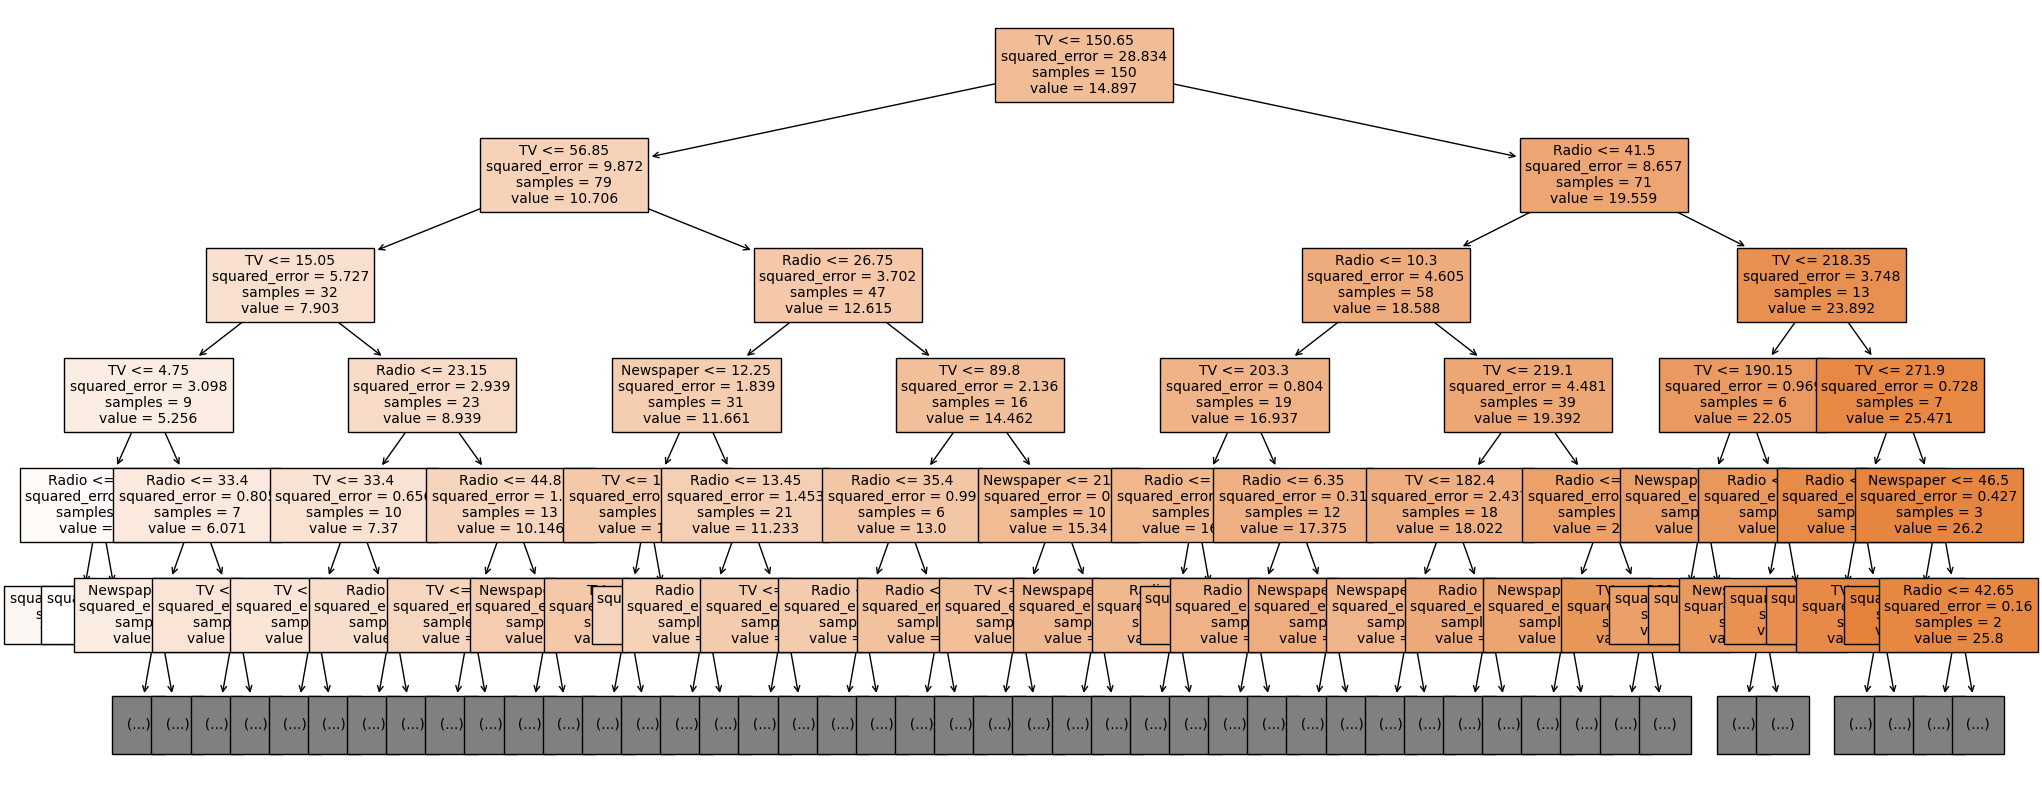

In [24]:
plt.figure(figsize=(25,10))
chart=tree.plot_tree(dt,max_depth=5,feature_names=x.columns,filled=True,fontsize=10)
plt.savefig('abc.jpg')

In [25]:
Train = dt.score(xtrain,ytrain)
Test = dt.score(xtest,ytest)

In [26]:
print(f"Train score :{Train}\nTest score : {Test}")

Train score :1.0
Test score : 0.9473736399779379


### i - max_depth

In [27]:
for i in range(1,50):
    dt1= DecisionTreeRegressor(max_depth=i)
    dt1.fit(xtrain,ytrain)
    ypred=dt1.predict(xtest)
    
    rs=r2_score(ytest,ypred)
    
    print(f"max_depth {i}  r2_score {rs}")

max_depth 1  r2_score 0.6678520151470604
max_depth 2  r2_score 0.841293737298281
max_depth 3  r2_score 0.9008187134033295
max_depth 4  r2_score 0.9313140930929052
max_depth 5  r2_score 0.9442750071407173
max_depth 6  r2_score 0.9530765869955855
max_depth 7  r2_score 0.9522932466545941
max_depth 8  r2_score 0.947667396744099
max_depth 9  r2_score 0.9457251536806568
max_depth 10  r2_score 0.9486891250875298
max_depth 11  r2_score 0.9568546388061261
max_depth 12  r2_score 0.9560188029268436
max_depth 13  r2_score 0.9406795335960673
max_depth 14  r2_score 0.9457042867655013
max_depth 15  r2_score 0.9464388021789734
max_depth 16  r2_score 0.9574982672113656
max_depth 17  r2_score 0.9462551733256054
max_depth 18  r2_score 0.9528908523450407
max_depth 19  r2_score 0.9488176305066955
max_depth 20  r2_score 0.9498693230305305
max_depth 21  r2_score 0.9460214638758643
max_depth 22  r2_score 0.9550693582872704
max_depth 23  r2_score 0.9462468265595432
max_depth 24  r2_score 0.9465806972020305
max

In [28]:
dt2=DecisionTreeRegressor(max_depth=3)
mymodel(dt2)

0.9008187134033295


In [29]:
dt2.score(xtrain,ytrain)

0.9103816108422005

In [30]:
dt2.score(xtest,ytest)

0.9008187134033295

### ii - min_samples_split

In [31]:
for i in range(2,50):
    dt3= DecisionTreeRegressor(min_samples_split=i)
    dt3.fit(xtrain,ytrain)
    ypred=dt3.predict(xtest)
    
    rs=r2_score(ytest,ypred)
    
    print(f"min_samples_split {i}  r2_score {rs}")

min_samples_split 2  r2_score 0.9380586490525419
min_samples_split 3  r2_score 0.9460110304182865
min_samples_split 4  r2_score 0.9508171446878139
min_samples_split 5  r2_score 0.9487637243092105
min_samples_split 6  r2_score 0.9453511142264952
min_samples_split 7  r2_score 0.9371823104909427
min_samples_split 8  r2_score 0.9411356922160321
min_samples_split 9  r2_score 0.9422112078013363
min_samples_split 10  r2_score 0.9462318280844227
min_samples_split 11  r2_score 0.9496984935244238
min_samples_split 12  r2_score 0.940622428777558
min_samples_split 13  r2_score 0.9390286083249535
min_samples_split 14  r2_score 0.9241713351481272
min_samples_split 15  r2_score 0.9241713351481271
min_samples_split 16  r2_score 0.9256092047151058
min_samples_split 17  r2_score 0.9177554467663878
min_samples_split 18  r2_score 0.9177554467663878
min_samples_split 19  r2_score 0.9182236616735361
min_samples_split 20  r2_score 0.9157495020435305
min_samples_split 21  r2_score 0.9157495020435305
min_sampl

In [32]:
dt4=DecisionTreeRegressor(min_samples_split=4)
mymodel(dt4)

0.9517485046675858


In [33]:
dt4.score(xtrain,ytrain)

0.9945866481186406

In [34]:
dt4.score(xtest,ytest)

0.9517485046675858

### iii - min_samples_leaf

In [35]:
for i in range(1,50):
    dt5= DecisionTreeRegressor(min_samples_leaf=i)
    dt5.fit(xtrain,ytrain)
    ypred=dt5.predict(xtest)
    
    rs=r2_score(ytest,ypred)
    
    print(f"min_samples_leaf {i}  r2_score {rs}")

min_samples_leaf 1  r2_score 0.9396862684346676
min_samples_leaf 2  r2_score 0.9551164247736765
min_samples_leaf 3  r2_score 0.9478521299351831
min_samples_leaf 4  r2_score 0.9497045249356445
min_samples_leaf 5  r2_score 0.9391040524858301
min_samples_leaf 6  r2_score 0.9420605336219824
min_samples_leaf 7  r2_score 0.9277002531455355
min_samples_leaf 8  r2_score 0.9200232654046393
min_samples_leaf 9  r2_score 0.908414033755265
min_samples_leaf 10  r2_score 0.9109972553165679
min_samples_leaf 11  r2_score 0.9019393659203739
min_samples_leaf 12  r2_score 0.9019393659203738
min_samples_leaf 13  r2_score 0.9096368826787403
min_samples_leaf 14  r2_score 0.9244887159059948
min_samples_leaf 15  r2_score 0.9247135020153384
min_samples_leaf 16  r2_score 0.9156301730150505
min_samples_leaf 17  r2_score 0.90034363927901
min_samples_leaf 18  r2_score 0.9067930309218319
min_samples_leaf 19  r2_score 0.8987293823502929
min_samples_leaf 20  r2_score 0.9002056707881939
min_samples_leaf 21  r2_score 0.

In [36]:
dt6=DecisionTreeRegressor(min_samples_leaf=5)
mymodel(dt6)

0.9391040524858301


In [37]:
dt6.score(xtrain,ytrain)

0.9652052058885029

In [38]:
dt6.score(xtest,ytest)

0.9391040524858301

#### We have achieved an Accuracy of 94 % which is good Enough.

### 3 - Predicting the data using Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
rfr = RandomForestRegressor(n_estimators=100, max_depth=5)

rfr.fit(xtrain, ytrain)
ypred = rfr.predict(xtest)

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('MSE:', mean_squared_error(ytest, ypred))
print('MAE:', mean_absolute_error(ytest, ypred))
print('r2_score:', r2_score(ytest, ypred))

MSE: 0.9950717894799727
MAE: 0.8260968778918206
r2_score: 0.9584718427906656


#### by using Random Forest We have achieved an Accuracy of 96% which is good Enough.

### 4 - Predicting by using KNN Regressor

In [41]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5) # by default n_neighbors = 5
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

In [42]:
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print("Mean Squared Error:", mse)
print("r-squared:", r2)

Mean Squared Error: 1.7853199999999998
r-squared: 0.9254917580693196


#### by using Random Forest We have achieved an Accuracy of 93% which is good.

### CONCLUSION

#### Based on the above accuracy scores, we should go ahead with Random forest. The best predictive model for the above dataset is Random Forest and its Accuracy is given by accuracy 96%. 